In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
import joblib as jb

In [36]:
df = pd.read_csv("sample.csv")
df


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Owner,1,0,2,BHK,1050.241272,0,1,"Paota,Jodhpur",26.295640,73.039430,37.0
144,Dealer,0,1,3,BHK,1400.241838,1,1,"Raj Nagar Extension,Ghaziabad",26.900926,75.775927,57.9
145,Dealer,0,0,3,BHK,1740.139211,1,1,"Sector 19 Kharghar,Mumbai",19.048979,73.078232,180.0
146,Dealer,0,1,2,BHK,1149.131767,1,1,"Marol,Lalitpur",24.690280,78.418890,180.0


In [37]:
df=df.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,1300.236407,12.969910,77.597960,55.0
1,1275.000000,12.274538,76.644605,51.0
2,933.159722,12.778033,77.632191,43.0
3,929.921143,28.642300,77.344500,62.5
4,999.009247,22.592200,88.484911,60.5
...,...,...,...,...
143,1050.241272,26.295640,73.039430,37.0
144,1400.241838,26.900926,75.775927,57.9
145,1740.139211,19.048979,73.078232,180.0
146,1149.131767,24.690280,78.418890,180.0


Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

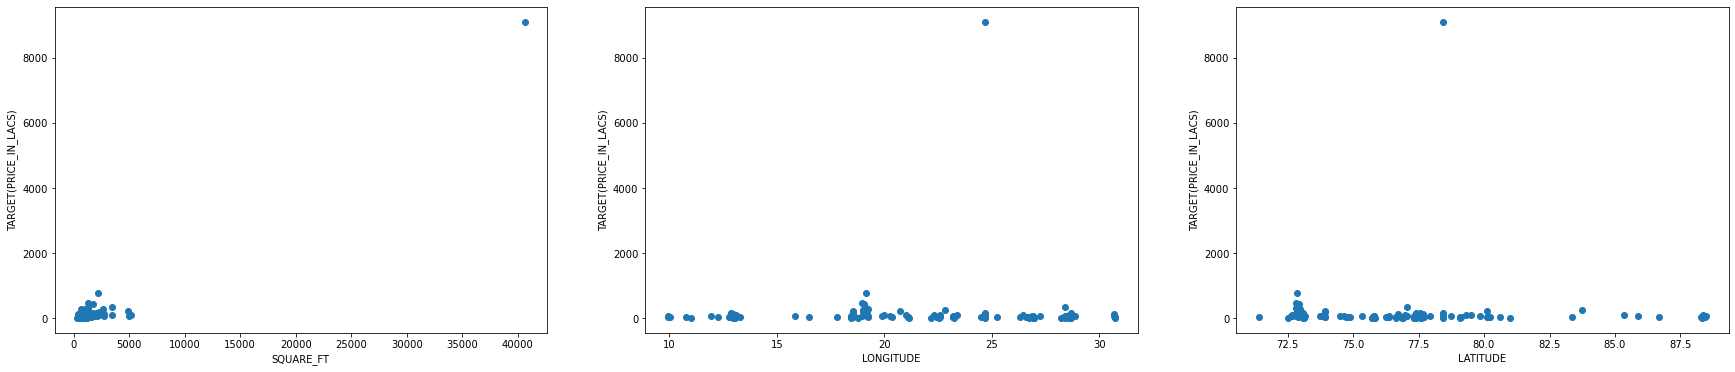

In [38]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(df['SQUARE_FT'], df['TARGET(PRICE_IN_LACS)'])
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(132)
plt.scatter(df['LONGITUDE'], df['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LONGITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(133)
plt.scatter(df['LATITUDE'], df['TARGET(PRICE_IN_LACS)'])
plt.xlabel('LATITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')

In [55]:
df_values=df.values
x=df_values[:,0:3]
y=df_values[:,3]
x

array([[1.30023641e+03, 1.29699100e+01, 7.75979600e+01],
       [1.27500000e+03, 1.22745380e+01, 7.66446050e+01],
       [9.33159722e+02, 1.27780330e+01, 7.76321910e+01],
       [9.29921143e+02, 2.86423000e+01, 7.73445000e+01],
       [9.99009247e+02, 2.25922000e+01, 8.84849110e+01],
       [1.25000000e+03, 1.00332800e+01, 7.62825710e+01],
       [1.49505396e+03, 2.69163470e+01, 7.57956000e+01],
       [1.18101295e+03, 3.07400000e+01, 7.66500000e+01],
       [1.04000000e+03, 1.30542020e+01, 7.76740020e+01],
       [8.79120879e+02, 1.29516100e+01, 8.01409700e+01],
       [1.35030864e+03, 2.67242190e+01, 8.83263570e+01],
       [1.33301018e+03, 1.30403400e+01, 7.75913470e+01],
       [9.27177902e+02, 1.29699100e+01, 7.75979600e+01],
       [1.12217195e+03, 2.85877110e+01, 7.74031230e+01],
       [6.49983750e+02, 1.30352000e+01, 7.75772000e+01],
       [1.39411765e+03, 2.84296140e+01, 7.74817110e+01],
       [1.80008471e+03, 2.02752670e+01, 8.58624070e+01],
       [2.12489671e+03, 1.28855

In [40]:
x.shape,y.shape

((148, 3), (148,))

In [52]:
y=y.reshape(-1,1)


array([[  55. ],
       [  51. ],
       [  43. ],
       [  62.5],
       [  60.5],
       [  42. ],
       [  66.5],
       [  52. ],
       [  41.6],
       [  36. ],
       [  35. ],
       [ 110. ],
       [  48. ],
       [  62. ],
       [  20. ],
       [  71.1],
       [  85. ],
       [ 180. ],
       [  22. ],
       [ 120. ],
       [  45. ],
       [  42. ],
       [  55. ],
       [ 300. ],
       [  50. ],
       [  27.5],
       [  46. ],
       [  22.9],
       [  39. ],
       [  12.5],
       [  52. ],
       [  33. ],
       [  55. ],
       [  82. ],
       [ 240. ],
       [  55. ],
       [  65. ],
       [  65. ],
       [  35. ],
       [  75. ],
       [9110. ],
       [  65. ],
       [  30. ],
       [ 250. ],
       [ 220. ],
       [  38. ],
       [  60. ],
       [  46. ],
       [  26.3],
       [  51.6],
       [  55. ],
       [  71.9],
       [ 130. ],
       [  32.5],
       [  39.9],
       [  59.9],
       [  65. ],
       [ 110. ],
       [  68.5

In [43]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [44]:
y_p=reg.predict(x)
y_p

array([[ 1.20261909e+02],
       [ 1.19692219e+02],
       [ 4.01375695e+01],
       [-3.16015246e+01],
       [-1.07589486e+01],
       [ 1.24999039e+02],
       [ 1.03787796e+02],
       [ 1.56391598e+01],
       [ 6.23633624e+01],
       [ 2.25571090e+01],
       [ 4.83499362e+01],
       [ 1.27182087e+02],
       [ 3.80196777e+01],
       [ 1.09131263e+01],
       [-2.33430714e+01],
       [ 7.14250311e+01],
       [ 1.81401694e+02],
       [ 3.02508944e+02],
       [ 3.62987436e+01],
       [ 3.13328801e+02],
       [ 2.26193324e+01],
       [ 2.43212928e+01],
       [ 5.27723943e+01],
       [-4.56879971e+01],
       [ 6.29372481e+01],
       [-5.84921644e+01],
       [ 1.15974705e+02],
       [ 1.56320037e+01],
       [-1.55840581e+01],
       [-1.32605065e+01],
       [ 7.30801688e+01],
       [-2.81388631e+01],
       [ 3.10364924e+01],
       [ 5.10737962e+00],
       [ 3.76282347e+00],
       [ 8.79117227e+01],
       [ 4.05671921e+01],
       [ 1.64835432e+02],
       [ 2.0

In [50]:
jb.dump(reg,'model_1')


['model_1']